In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
max_aggre = 10  # xth aggregation from which to take the final prediction
no_epochs = 10 # define how which epoch to take results from for graphing purposes

# top dc_federated results - imbalanced
unbal_dc_jobid = "06_08_2021_154225_combined/"

# top dc_federated results - balanced
bal_dc_jobid = "06_08_2021_154356_combined/"

# define file names
train_name = "_yhat_train_worker_"
test_name = "_yhat_test_worker_"

worker_A = 'A.csv'
worker_B = 'B.csv'
worker_C = 'C.csv'

# Helper Functions

In [3]:
def calc_RMSE(df, epochs, type='train', col=-1):
    rmse = []
    for epoch in range(epochs):
        rms = mean_squared_error(df[str(epoch)], df.iloc[:,col:], squared=False)
        rmse.append(rms)
    return rmse

# Comparative train results

Combined train RMSE: 15.78
Worker A final train RMSE: 14.42
Worker B final train RMSE: 16.60
Worker C final train RMSE: 16.27


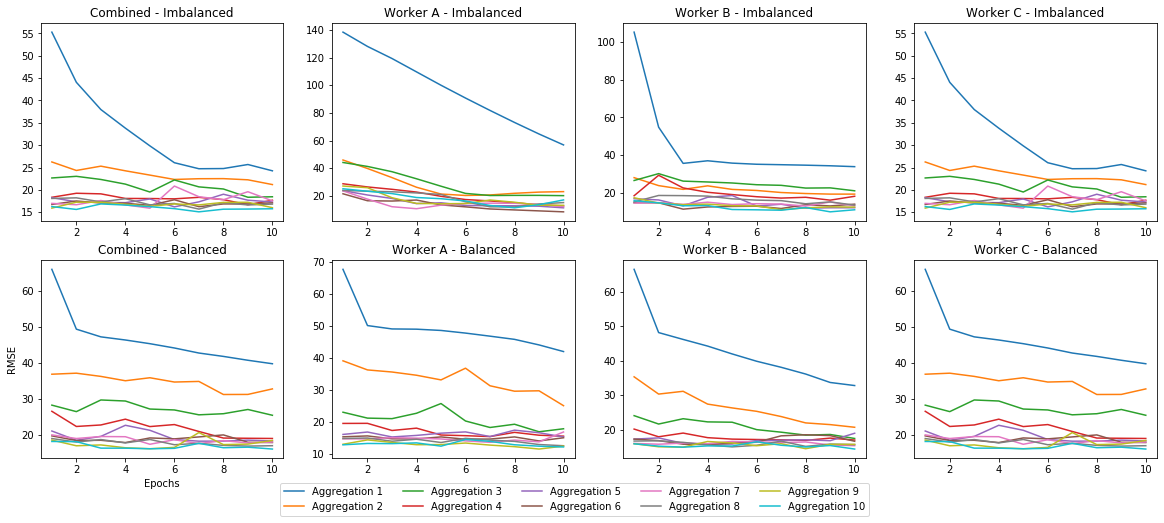

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # width x height)
rmse_A, rmse_B, rmse_C, rmse_total = 0, 0, 0, 0
for aggre in range(max_aggre):
    aggre += 1
    for i, data in enumerate([unbal_dc_jobid, bal_dc_jobid]):
        df_A = pd.read_csv(data + str(aggre) + train_name + worker_A, index_col=0)
        rmse_A = calc_RMSE(df_A, no_epochs)
        axes[i, 1].plot(range(1, len(rmse_A)+1), rmse_A, label="Aggregation "+str(aggre))

        df_B = pd.read_csv(data + str(aggre) + train_name + worker_B, index_col=0)
        rmse_B = calc_RMSE(df_B, no_epochs)
        axes[i, 2].plot(range(1, len(rmse_B)+1), rmse_B, label="Aggregation "+str(aggre))

        df_C = pd.read_csv(data + str(aggre) + train_name + worker_C, index_col=0)
        rmse_C = calc_RMSE(df_C, no_epochs)
        axes[i, 3].plot(range(1, len(rmse_C)+1), rmse_C, label="Aggregation "+str(aggre))

        df_total = df_A.append(df_B).append(df_C)
        rmse_total = calc_RMSE(df_total, no_epochs)
        axes[i, 0].plot(range(1, len(rmse_C)+1), rmse_C, label="Aggregation "+str(aggre))
        
        label = 'Imbalanced'
        if i == 1:
            label = 'Balanced'
            
        axes[i, 0].title.set_text('Combined - '+label) 
        axes[i, 1].title.set_text('Worker A - '+label) 
        axes[i, 2].title.set_text('Worker B - '+label) 
        axes[i, 3].title.set_text('Worker C - '+label) 

print('Combined train RMSE: '+ '{0:.2f}'.format(rmse_total[-5]))  
print('Worker A final train RMSE: '+ '{0:.2f}'.format(rmse_A[-5]))  
print('Worker B final train RMSE: '+ '{0:.2f}'.format(rmse_B[-5]))  
print('Worker C final train RMSE: '+ '{0:.2f}'.format(rmse_C[-5]))  

axes[1, 1].legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=5)
_ = axes[1, 0].set_xlabel("Epochs")
_ = axes[1, 0].set_ylabel("RMSE")

# Comparative test results

Worker A final test RMSE: 18.57
Worker B final test RMSE: 46.39
Worker C final test RMSE: 18.05
Worker A final test RMSE: 26.94
Worker B final test RMSE: 22.82
Worker C final test RMSE: 17.96


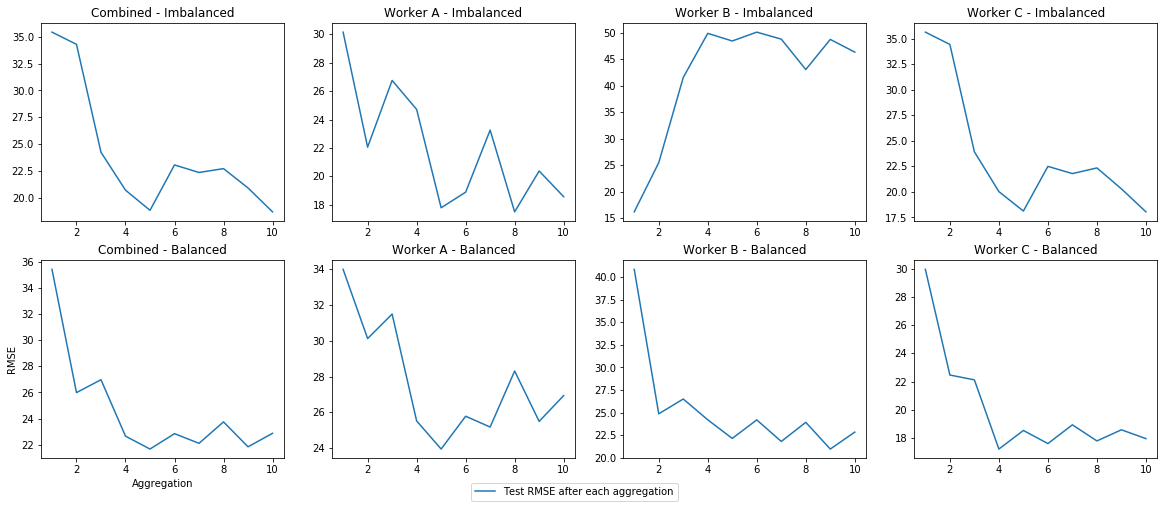

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # width x height)
rmse_A, rmse_B, rmse_C = 0, 0, 0

for j, data in enumerate([unbal_dc_jobid, bal_dc_jobid]):
    for i, worker in enumerate(['A.csv', 'B.csv', 'C.csv']):
        rmse_list = []
        for aggre in range(max_aggre):
            df = pd.read_csv(data + str(aggre+1) + test_name + worker, index_col=0)
            rmse = calc_RMSE(df, 1)
            rmse_list.append(rmse)
        axes[j, i+1].plot(range(1, len(rmse_list)+1), rmse_list, label="Test RMSE after each aggregation")

        label = 'Imbalanced'
        if j == 1:
            label = 'Balanced'
        axes[j, 0].title.set_text('Combined - '+label)   
        axes[j, i+1].title.set_text('Worker ' + chr(65+i) + ' - ' + label)   
        print('Worker ' + chr(65+i) + ' final test RMSE: '+ '{0:.2f}'.format(rmse_list[-1][0]))
    
for j, data in enumerate([unbal_dc_jobid, bal_dc_jobid]):  
    rmse_list = []
    for aggre in range(max_aggre):
        df_A = pd.read_csv(data + str(aggre+1) + test_name + 'A.csv')
        df_B = pd.read_csv(data + str(aggre+1) + test_name + 'B.csv')
        df_C = pd.read_csv(data + str(aggre+1) + test_name + 'C.csv')
        
        df_temp = df_A.append(df_B)
        df_temp = df_temp.append(df_C)
        
        rmse = calc_RMSE(df_temp, 1)
        rmse_list.append(rmse)
    axes[j, 0].plot(range(1, len(rmse_list)+1), rmse_list, label="Test RMSE after each aggregation")   

axes[1, 1].legend(loc='upper center', bbox_to_anchor=(1.0, -0.1), ncol=5)
_ = axes[1,0].set_xlabel("Aggregation")
_ = axes[1,0].set_ylabel("RMSE")

# Add back engine id

In [6]:
# extract engine id
data_path = 'C:/Users/chanzl_thinkpad/Desktop/FATE-Ubuntu/data/'

train_unit_num_bal = []
test_unit_num_bal = []

train_unit_num_imbal = []
test_unit_num_imbal = []

In [7]:
# for balanced dataset
for party in ['party_A', 'party_B', 'party_C']:
    df_temp_train = pd.read_csv(os.path.join(data_path, party + '_train_balanced.csv'))
    df_temp_test = pd.read_csv(os.path.join(data_path, party + '_test_balanced.csv'))
   
    df_temp_train["window num"] = df_temp_train.id % 100
    df_temp_train["unit num"] = (df_temp_train['id'] - df_temp_train['window num']) / 100
        
    df_temp_test["window num"] = df_temp_test.id % 100000
    df_temp_test["unit num"] = (df_temp_test['id'] - df_temp_test['window num']) / 100000
    
    train_unit_num_bal.append(df_temp_train['unit num'].tolist())    
    test_unit_num_bal.append(df_temp_test["unit num"].tolist())

In [8]:
# for balanced dataset
for party in ['party_A', 'party_B', 'party_C']:
    df_temp_train = pd.read_csv(os.path.join(data_path, party + '_train.csv'))
    df_temp_test = pd.read_csv(os.path.join(data_path, party + '_test.csv'))
   
    df_temp_train["window num"] = df_temp_train.id % 100
    df_temp_train["unit num"] = (df_temp_train['id'] - df_temp_train['window num']) / 100
        
    df_temp_test["window num"] = df_temp_test.id % 100000
    df_temp_test["unit num"] = (df_temp_test['id'] - df_temp_test['window num']) / 100000
    
    train_unit_num_imbal.append(df_temp_train['unit num'].tolist())    
    test_unit_num_imbal.append(df_temp_test["unit num"].tolist())

# Individual engines' results

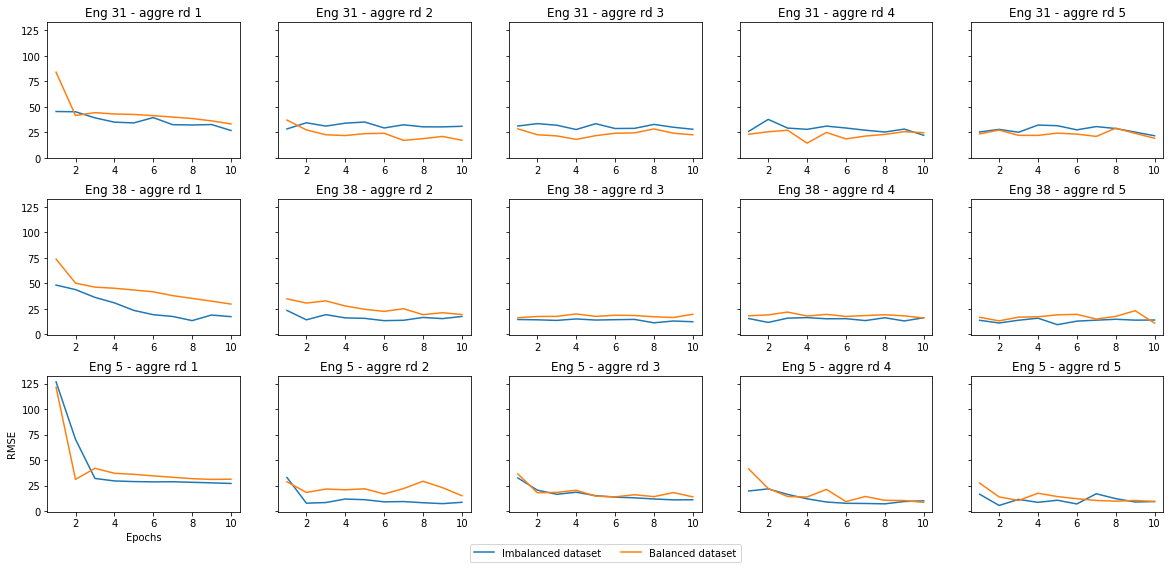

In [9]:
engines = [31, 38, 5]
fig, axes = plt.subplots(len(engines), 5, figsize=(20, len(engines)*3), 
                         sharey=True, gridspec_kw={'hspace': 0.3})  # width x height
unit_num_train = [train_unit_num_imbal, train_unit_num_bal]
no_epochs=10

for h, eng in enumerate(engines):
    for j, data in enumerate([unbal_dc_jobid, bal_dc_jobid]):
        train_unit_num = unit_num_train[j]
        for i, aggre in enumerate(range(5)):
            # combine the results
            df_A = pd.read_csv(data + str(aggre+1) + train_name + 'A.csv', index_col=0)
            df_A['unit num'] = train_unit_num[0]

            df_B = pd.read_csv(data + str(aggre+1) + train_name + 'B.csv', index_col=0)
            df_B['unit num'] = train_unit_num[1]

            df_C = pd.read_csv(data + str(aggre+1) + train_name + 'C.csv', index_col=0)
            df_C['unit num'] = train_unit_num[2]

            df_temp = df_A.append(df_B)
            df_temp = df_temp.append(df_C)
            df_temp = df_temp[df_temp['unit num'] == eng]
            df_temp.pop('unit num')
            rmse_temp = calc_RMSE(df_temp, no_epochs)
            
            labelling = 'Imbalanced dataset'
            if j == 1:
                labelling = 'Balanced dataset'
            
            axes[h, i].plot(range(1, len(rmse_temp)+1), rmse_temp, label=labelling)    
            axes[h, i].set_title('Eng ' + str(eng) + ' - aggre rd ' + str(aggre+1))
            
_ = axes[len(engines)-1, 2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
_ = axes[len(engines)-1,0].set_xlabel("Epochs")
_ = axes[len(engines)-1,0].set_ylabel("RMSE")